<a href="https://colab.research.google.com/github/unmei211/machine-learning/blob/main/07_hw_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
import pandas as pd
import numpy as np
pd.__version__ # 1.4.1

'1.5.3'

In [3]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
#Cdf = pd.read_csv('data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
print("колонны" , df.columns.size)
print("строки" , df.index.size)

колонны 15
строки 32561


3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: В таблице отсутствуют NaN значения

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
df['workclass'].nunique()

9

7) Какой средний возраст женщин и мужчин?

In [ ]:
df.groupby(['sex'])['age'].mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: >

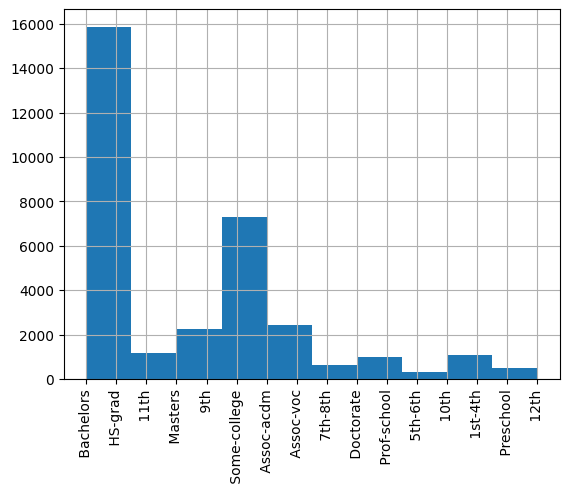

In [ ]:
df['education'].hist(xrot=90)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [ ]:
print(df.groupby(['income'])['age'].mean())
print(df.groupby(['income'])['age'].std())

income
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64

10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
print (len(df[df['income']== ' >50K']))
print(len(df[(df['income']==' >50K') & df['education'].isin([' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate'])]))

7841
4535


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
print(df[((df['marital.status'].str.contains('Married')) == False) & (df['sex'] == ' Male') & (df['income'] == ' >50K')].index.size)
print(df[((df['marital.status'].str.contains('Married'))) & (df['sex'] == ' Male') & (df['income'] == ' >50K')].index.size)

697
5965


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [ ]:
df.groupby(['native.country']).apply(lambda x: x[x['income'] == ' >50K' ]['hours.per.week'].mean())



native.country
 ?                             45.547945
 Cambodia                      40.000000
 Canada                        45.641026
 China                         38.900000
 Columbia                      50.000000
 Cuba                          42.440000
 Dominican-Republic            47.000000
 Ecuador                       48.750000
 El-Salvador                   45.000000
 England                       44.533333
 France                        50.750000
 Germany                       44.977273
 Greece                        50.625000
 Guatemala                     36.666667
 Haiti                         42.750000
 Holand-Netherlands                  NaN
 Honduras                      60.000000
 Hong                          45.000000
 Hungary                       50.000000
 India                         46.475000
 Iran                          47.500000
 Ireland                       48.000000
 Italy                         45.400000
 Jamaica                       41.100000
 

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [4]:
df['diff'] = df['capital.gain'] - df['capital.loss']
table = pd.pivot_table(df, index='education', values=['diff', 'capital.gain', 'capital.loss'],aggfunc="sum")
print (table)

               capital.gain  capital.loss     diff
education                                         
 10th                377468         53037   324431
 11th                252740         58843   193897
 12th                123010         14002   109008
 1st-4th              21147          8119    13028
 5th-6th              58615         22728    35887
 7th-8th             151125         42422   108703
 9th                 175834         14905   160929
 Assoc-acdm          683306         99678   583628
 Assoc-voc           988201        100547   887654
 Bachelors          9404984        633766  8771218
 Doctorate          1970070        108555  1861515
 HS-grad            6056978        739970  5317008
 Masters            4415297        287258  4128039
 Preschool            45818          3391    42427
 Prof-school        5998704        133173  5865531
 Some-college       4366027        522306  3843721


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [5]:
df.groupby(['native.country']).apply(lambda x: (x[x['income'] == ' >50K' ]['sex'] == " Female").mean()).sort_values(ascending = False)


native.country
 Dominican-Republic            1.000000
 Honduras                      1.000000
 Portugal                      0.500000
 Laos                          0.500000
 Nicaragua                     0.500000
 Scotland                      0.333333
 Thailand                      0.333333
 Hungary                       0.333333
 China                         0.250000
 France                        0.250000
 Haiti                         0.250000
 Canada                        0.230769
 Japan                         0.208333
 Ireland                       0.200000
 England                       0.200000
 Taiwan                        0.200000
 Vietnam                       0.200000
 Italy                         0.200000
 Philippines                   0.196721
 South                         0.187500
 Puerto-Rico                   0.166667
 Poland                        0.166667
 Yugoslavia                    0.166667
 Hong                          0.166667
 Germany                 

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [6]:

import random
df['magic_salary'] = df['income'].apply(lambda x: random.randint(51, 201) if x ==" >50K" else random.randint(0, 51) )
df1  = df.groupby(['education']).apply(lambda x: x['magic_salary'].mean())
print(df1)


education
 10th             31.311897
 11th             30.913191
 12th             32.445727
 1st-4th          29.916667
 5th-6th          28.324324
 7th-8th          31.332817
 9th              30.371595
 Assoc-acdm       50.652296
 Assoc-voc        52.274964
 Bachelors        66.880486
 Doctorate       101.552058
 HS-grad          41.508999
 Masters          81.203714
 Preschool        27.392157
 Prof-school     101.289931
 Some-college     44.779043
dtype: float64
